## GROUP 15 FINAL PROJECT

#### Identify and describe your dataset

The dataset, sourced from the website https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data, compiles crime data in the city of Los Angeles from 2020 to the present, offering a comprehensive record of public safety incidents. With a substantial dataset of 854,000 records, each row captures details of specific crimes, while the 28 columns provide a wealth of information including incident dates, locations, crime types, victim demographics, and investigative status. This dataset serves as a valuable resource for analyzing and understanding the dynamics of criminal activity in Los Angeles over the specified timeframe

#### Dataset Overview: Crime Incident Data

DR_NO: Unique report number assigned to each crime incident.

Date Rptd: Date when the crime was officially reported.

DATE OCC: Date of the actual occurrence of the crime.

TIME OCC: Time when the crime took place.

AREA: Numeric code indicating the geographic area where the incident occurred.

AREA NAME: Name of the geographic area where the incident occurred.

Rpt Dist No: Report district number associated with the incident.

Part 1-2: Classification of the crime as either Part 1 or Part 2.

Crm Cd: Code representing the type of crime.

Crm Cd Desc: Description of the crime.

Mocodes: Modus operandi codes providing details about the method used in the crime.

Vict Age: Age of the victim involved in the incident.

Vict Sex: Gender of the victim.

Vict Descent: Descent or ethnicity of the victim.

Premis Cd: Code indicating the type of premises where the incident occurred.

Premis Desc: Description of the premises.

Weapon Used Cd: Code indicating the weapon used in the crime.

Weapon Desc: Description of the weapon used.

Status: Current status of the crime report.

Status Desc: Description of the status of the crime report.

Crm Cd 1-4: Additional crime codes associated with the incident.

LOCATION: General location where the incident occurred.

Cross Street: Information about the cross street related to the incident.

LAT: Latitude coordinates of the incident location.

LON: Longitude coordinates of the incident location.

#### Why is important and what appeals to you about it

The importance of a dataset often lies in its relevance to a specific research question or analytical goal. If the dataset covers a wide range of crime incidents in Los Angeles from 2020 to the present, it could be crucial for studying crime patterns, identifying trends, and informing public safety strategies.

Datasets that provide a comprehensive view of a phenomenon, such as crime incidents, are valuable. The dataset you are using covers a significant time span (from 2020 to the present) and includes a large number of records (854k), making it potentially rich in information for various analyses.

A dataset's appeal often stems from the diversity of variables it includes. Your crime dataset contains 28 columns, covering aspects like date and time of occurrence, location, crime types, victim demographics, and more. This diversity allows for a nuanced exploration of crime-related factors.

Given that the dataset is specific to the city of Los Angeles, it is geographically focused. This can be advantageous for local policymakers, law enforcement agencies, and researchers seeking insights into crime dynamics within that particular region.


#### Is this dataset suitable for dimensional modeling and analytical analysis?


The crime dataset is suitable for dimensional modeling and analytical analysis due to its structured format and granular data. With key dimensions like time and location, along with fact and dimension tables, the dataset allows for comprehensive exploration of crime patterns. The inclusion of temporal information supports the creation of a time dimension for time-based analysis. Overall, these characteristics make the dataset well-suited for in-depth analytical investigations into crime trends and patterns.

In [1]:
!pip freeze | grep -E 'ipython-sql|psycopg2'

In [2]:
!dropdb -U student group15final

zsh:1: command not found: dropdb


In [91]:
!createdb -U student group15final

createdb: error: database creation failed: ERROR:  database "group15final" already exists


In [92]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [93]:
%sql postgresql://student@/group15final

In [6]:
!unzip -o Crime_Data_from_2020_to_Present.zip

Archive:  Crime_Data_from_2020_to_Present.zip
  inflating: Crime_Data_from_2020_to_Present.csv  


In [7]:
!unzip -o Crime_Data_from_2020_to_Present

Archive:  Crime_Data_from_2020_to_Present.zip
  inflating: Crime_Data_from_2020_to_Present.csv  


In [94]:
!mv Crime_Data_from_2020_to_Present.csv crimeData.csv

mv: cannot stat 'Crime_Data_from_2020_to_Present.csv': No such file or directory


To get the counts and returns the total number of lines in the "crimeData.csv"

In [6]:
!wc -l crimeData.csv

843515 crimeData.csv


To display the all column names and their corresponding indices in the "crimeData.csv" file

In [7]:
!csvcut -n crimeData.csv

  1: DR_NO
  2: Date Rptd
  3: DATE OCC
  4: TIME OCC
  5: AREA
  6: AREA NAME
  7: Rpt Dist No
  8: Part 1-2
  9: Crm Cd
 10: Crm Cd Desc
 11: Mocodes
 12: Vict Age
 13: Vict Sex
 14: Vict Descent
 15: Premis Cd
 16: Premis Desc
 17: Weapon Used Cd
 18: Weapon Desc
 19: Status
 20: Status Desc
 21: Crm Cd 1
 22: Crm Cd 2
 23: Crm Cd 3
 24: Crm Cd 4
 25: LOCATION
 26: Cross Street
 27: LAT
 28: LON


Selecting only the relevant columns for analytics, the command extracts specific data from the "crimeData.csv" file and saves the refined dataset to a new file named "Crime_data.csv."

In [8]:
!csvcut -c 1,2,3,4,5,6,7,9,10,12,13,14,15,16,17,18,19,20,25,26,27,28  crimeData.csv > Crime_data.csv

Exploring the dataset, checking data quality, and obtaining key information about the data's structure and characteristics.

In [9]:
!head -n 10000 Crime_data.csv | csvstat

  1. "DR_NO"

	Type of data:          Number
	Contains null values:  False
	Unique values:         9999
	Smallest value:        10304468
	Largest value:         222108906
	Sum:                   2011509973880
	Mean:                  201171114.499
	Median:                200509281
	StDev:                 3442026.547
	Most common values:    10304468 (1x)
	                       190101086 (1x)
	                       200110444 (1x)
	                       191501505 (1x)
	                       191921269 (1x)

  2. "Date Rptd"

	Type of data:          DateTime
	Contains null values:  False
	Unique values:         557
	Smallest value:        2020-01-01 00:00:00
	Largest value:         2022-08-20 00:00:00
	Most common values:    2020-01-16 00:00:00 (161x)
	                       2020-01-30 00:00:00 (151x)
	                       2020-01-27 00:00:00 (135x)
	                       2020-01-28 00:00:00 (135x)
	                       2020-01-25 00:00:00 (130x)

  3. "DATE OCC"

	Type of data:    

### Creating Tables

Dropping the table if it already exists, the command creates a new table named "CRIME_DATA" to house all the relevant data. This ensures a clean slate for the table, avoiding potential conflicts, and establishes a fresh structure to accommodate the dataset.

In [10]:
%%sql
DROP TABLE IF EXISTS CRIME_DATA;
CREATE TABLE CRIME_DATA(
    DR_NO      INTEGER NOT NULL,
    Date_Rptd  TIMESTAMP NOT NULL,
    Date_Occ   TIMESTAMP NOT NULL,
    Time_Occ   INTEGER,
    Area       CHAR(5)     NOT NULL,
    Area_Name  CHAR(255)      NOT NULL,
    Rpt_Dist_No INTEGER     NOT NULL,
    Crm_Cd     INTEGER   NOT NULL,
    Crm_Cd_Desc CHAR(60)     NOT NULL,
    Vict_Age   INTEGER,
    Vict_Sex   CHAR,
    Vict_Descent CHAR,
    Premis_Cd  INTEGER,
    Premis_Desc CHAR(64),
    Weapon_Used_Cd INTEGER,
    Weapon_Desc CHAR(50),
    Status     CHAR(5),
    Status_Desc CHAR(15),
    Location   CHAR(40) NOT NULL,
    Cross_Street CHAR(35),
    Lat    VARCHAR(25),
    Lon    VARCHAR(25)
);


 * postgresql://student@/group15final
Done.
Done.


[]

In [11]:
!pwd

/home/ubuntu/notebooks/Final Project


This SQL command facilitates the seamless transfer of data from the specified file path ("Crime_data.csv") to the pre-existing "CRIME_DATA" table, streamlining the data loading process.

In [12]:
%%sql
COPY CRIME_DATA FROM '/home/ubuntu/notebooks/Final Project/Crime_data.csv'
CSV
HEADER;

 * postgresql://student@/group15final
843514 rows affected.


[]

This SQL query retrieves the first five rows from the "CRIME_DATA" table, providing a glimpse of the dataset's structure and content.

In [13]:
%%sql
SELECT * FROM CRIME_DATA
LIMIT(5);

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,location,cross_street,lat,lon
10304468,2020-01-08 00:00:00,2020-01-08 00:00:00,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,501,SINGLE FAMILY DWELLING,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,None,34.0141,-118.2978
190101086,2020-01-02 00:00:00,2020-01-01 00:00:00,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,102,SIDEWALK,500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,None,34.0459,-118.2545
200110444,2020-04-14 00:00:00,2020-02-13 00:00:00,1200,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726,POLICE FACILITY,None,None,AA,Adult Arrest,200 E 6TH ST,None,34.0448,-118.2474
191501505,2020-01-01 00:00:00,2020-01-01 00:00:00,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",None,None,IC,Invest Cont,5400 CORTEEN PL,None,34.1685,-118.4019
191921269,2020-01-01 00:00:00,2020-01-01 00:00:00,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",31,X,X,409,BEAUTY SUPPLY STORE,None,None,IC,Invest Cont,14400 TITUS ST,None,34.2198,-118.4468


### Data Cleaning and Wrangling

Correcting inaccuracies in the dataset, the data cleaning process is underway to improve data accuracy and integrity.

This SQL query counts the number of records in the "CRIME_DATA" table where the victim's age is less than or equal to 0, providing insights into potential data anomalies.

In [14]:
%%sql
SELECT COUNT(*) FROM CRIME_DATA
WHERE Vict_Age <= 0
LIMIT 5;

 * postgresql://student@/group15final
1 rows affected.


count
209076


Correcting the "VICT_AGE" values to NULL for records where the victim's age is less than or equal to 0 is performed because the age of the victim cannot be validly represented as equal to or less than 0. This action is part of data cleaning to enhance the accuracy and reliability of the dataset.

In [15]:
%%sql
UPDATE CRIME_DATA
SET VICT_AGE = NULL
WHERE VICT_AGE <= 0

 * postgresql://student@/group15final
209076 rows affected.


[]

Ensuring that there are no entries indicating victims with ages less than 0.

In [16]:
%%sql
SELECT COUNT(*) FROM CRIME_DATA
WHERE Vict_Age <= 0
LIMIT 5;

 * postgresql://student@/group15final
1 rows affected.


count
0


In [17]:
%%sql
SELECT Vict_Sex, COUNT(*) as COUNTBYSEX
FROM CRIME_DATA
GROUP BY Vict_Sex
LIMIT 5;


 * postgresql://student@/group15final
5 rows affected.


vict_sex,countbysex
-,1
F,310271
H,92
M,347731
X,74103


In [18]:
%%sql
SELECT Vict_Descent, COUNT(*) as COUNTBY_Vict_DESCENT
FROM CRIME_DATA
GROUP BY Vict_Descent
LIMIT 5;

 * postgresql://student@/group15final
5 rows affected.


vict_descent,countby_vict_descent
-,2
A,18494
B,119849
C,3260
D,64


In [19]:
%%sql
SELECT COUNT(*) FROM CRIME_DATA
WHERE Vict_Sex IS NULL
AND  Vict_Descent IS NULL
AND   Vict_Sex IS NULL
LIMIT 5;

 * postgresql://student@/group15final
1 rows affected.


count
111312


In [20]:
%%sql
SELECT COUNT(*) FROM CRIME_DATA
WHERE LAT = '0' AND LON = '0';

 * postgresql://student@/group15final
1 rows affected.


count
2263


In [21]:
%%sql
SELECT Area, Area_name, Lat, Lon, COUNT(*) as total_number
FROM CRIME_DATA
WHERE Lat = '0' AND Lon = '0'
GROUP BY Area, Area_name, Lat, Lon
LIMIT 25;

 * postgresql://student@/group15final
21 rows affected.


area,area_name,lat,lon,total_number
1,Central,0,0,194
10,West Valley,0,0,37
11,Northeast,0,0,43
12,77th Street,0,0,137
13,Newton,0,0,98
14,Pacific,0,0,173
15,N Hollywood,0,0,92
16,Foothill,0,0,74
17,Devonshire,0,0,96
18,Southeast,0,0,160


In [22]:
%%sql
ALTER TABLE Crime_data
ADD COLUMN new_time varchar(50);


 * postgresql://student@/group15final
Done.


[]

### Creating the Dimention and Fact Tables

##### Creating and Loading Data for the Facts as FACT_TABLE

In [23]:
%%sql
DROP TABLE IF EXISTS FACT_TABLE;

CREATE TABLE FACT_TABLE (
    DR_NO      INTEGER NOT NULL,
    Date_Rptd  TIMESTAMP NOT NULL,
    Date_Occ   TIMESTAMP NOT NULL,
    Time_Occ   INTEGER,
    Area       CHAR(5)     NOT NULL,
    Rpt_Dist_No INTEGER     NOT NULL,
    Crm_Cd     INTEGER   NOT NULL,
    Vict_Age   INTEGER,
    Vict_Sex   CHAR,
    Vict_Descent CHAR,
    Premis_Cd  INTEGER,
    Weapon_Used_Cd INTEGER,
    Status     CHAR(5),
    Location   CHAR(40) NOT NULL,
    Cross_Street CHAR(35),
    Lat    VARCHAR(25),
    Lon    VARCHAR(25),
    PRIMARY KEY (DR_NO)
)

 * postgresql://student@/group15final
Done.
Done.


[]

In [24]:
%%sql
INSERT INTO FACT_TABLE (DR_NO, DATE_RPTD, DATE_OCC, TIME_OCC, AREA, RPT_DIST_NO,
    CRM_CD,VICT_AGE,VICT_SEX,VICT_DESCENT, PREMIS_CD, WEAPON_USED_CD, STATUS, LOCATION, CROSS_STREET, LAT, LON)
SELECT DISTINCT DR_NO, DATE_RPTD, DATE_OCC, TIME_OCC, AREA, RPT_DIST_NO,
    CRM_CD,VICT_AGE,VICT_SEX,VICT_DESCENT, PREMIS_CD, WEAPON_USED_CD, STATUS, LOCATION, CROSS_STREET, LAT, LON
FROM Crime_Data
WHERE DR_NO IS NOT NULL;

 * postgresql://student@/group15final
843514 rows affected.


[]

In [25]:
%%sql
SELECT * FROM FACT_TABLE LIMIT 5;

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,status,location,cross_street,lat,lon
817,2020-09-20 00:00:00,2020-09-19 00:00:00,1700,17,1777,510,None,None,None,101,None,IC,9100 RUBIO AV,None,34.2367,-118.4955
2113,2021-06-21 00:00:00,2021-04-05 00:00:00,1835,13,1385,510,None,None,None,101,None,IC,800 E GAGE AV,None,33.982,-118.2622
2203,2022-12-31 00:00:00,2022-12-19 00:00:00,1930,3,356,522,None,None,None,502,None,IC,1400 W 37TH ST,None,34.021,-118.3002
2315,2023-07-23 00:00:00,2023-07-22 00:00:00,1800,15,1566,420,None,None,None,101,None,IC,4400 ENSIGN AV,None,34.1504,-118.3712
10304468,2020-01-08 00:00:00,2020-01-08 00:00:00,2230,3,377,624,36,F,B,501,400,AO,1100 W 39TH PL,None,34.0141,-118.2978


##### Creating and Loading Data for the Crime Dimention as Crime_Table

In [26]:
%%sql
DROP TABLE IF EXISTS Crime_Table;
CREATE TABLE Crime_Table (
    Crime_key SERIAL PRIMARY KEY,
    Crm_cd INTEGER NOT NULL,
    Crm_cd_desc CHAR(200) NOT NULL
);

 * postgresql://student@/group15final
Done.
Done.


[]

In [27]:
%%sql
INSERT INTO Crime_Table (Crm_cd, Crm_cd_desc)
SELECT DISTINCT Crm_cd, Crm_cd_desc
FROM Crime_Data
WHERE Crm_cd IS NOT NULL;

 * postgresql://student@/group15final
138 rows affected.


[]

In [28]:
%%sql
SELECT * FROM Crime_Table LIMIT 5;

 * postgresql://student@/group15final
5 rows affected.


crime_key,crm_cd,crm_cd_desc
1,110,CRIMINAL HOMICIDE
2,113,"MANSLAUGHTER, NEGLIGENT"
3,121,"RAPE, FORCIBLE"
4,122,"RAPE, ATTEMPTED"
5,210,ROBBERY


In [29]:
%%sql
ALTER TABLE FACT_TABLE
ADD COLUMN crime_key INTEGER,
ADD CONSTRAINT fk_Crime_Table
    FOREIGN KEY (crime_key)
    REFERENCES Crime_Table(crime_key)

 * postgresql://student@/group15final
Done.


[]

In [30]:
%%sql
SELECT * FROM FACT_TABLE LIMIT 5;

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,status,location,cross_street,lat,lon,crime_key
817,2020-09-20 00:00:00,2020-09-19 00:00:00,1700,17,1777,510,None,None,None,101,None,IC,9100 RUBIO AV,None,34.2367,-118.4955,None
2113,2021-06-21 00:00:00,2021-04-05 00:00:00,1835,13,1385,510,None,None,None,101,None,IC,800 E GAGE AV,None,33.982,-118.2622,None
2203,2022-12-31 00:00:00,2022-12-19 00:00:00,1930,3,356,522,None,None,None,502,None,IC,1400 W 37TH ST,None,34.021,-118.3002,None
2315,2023-07-23 00:00:00,2023-07-22 00:00:00,1800,15,1566,420,None,None,None,101,None,IC,4400 ENSIGN AV,None,34.1504,-118.3712,None
10304468,2020-01-08 00:00:00,2020-01-08 00:00:00,2230,3,377,624,36,F,B,501,400,AO,1100 W 39TH PL,None,34.0141,-118.2978,None


In [31]:
%%sql
UPDATE FACT_TABLE AS F
SET CRIME_KEY = C.CRIME_KEY
FROM CRIME_Table AS C
WHERE F.CRM_CD = C.CRM_CD;

 * postgresql://student@/group15final
843514 rows affected.


[]

In [32]:
%%sql
SELECT * FROM FACT_TABLE LIMIT 5;

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,status,location,cross_street,lat,lon,crime_key
200100694,2020-03-20 00:00:00,2020-03-17 00:00:00,230,1,162,745,None,M,W,203,None,IC,700 W 7TH ST,None,34.048,-118.2577,81
200113661,2020-06-19 00:00:00,2020-06-15 00:00:00,2030,1,192,510,None,None,None,108,None,IC,1400 S FIGUEROA ST,None,34.0393,-118.2689,57
200114168,2020-06-30 00:00:00,2020-02-01 00:00:00,1800,1,142,510,None,None,None,108,None,IC,300 S OLIVE ST,None,34.0516,-118.2508,57
200114472,2020-07-07 00:00:00,2020-07-07 00:00:00,715,1,111,510,None,None,None,101,None,IC,600 N HILL ST,None,34.0591,-118.2412,57
200116512,2020-08-17 00:00:00,2020-08-11 00:00:00,1657,1,121,510,None,None,None,101,None,IC,100 N FREMONT AV,None,34.0584,-118.2531,57


In [33]:
%%sql
SELECT COUNT(*) FROM FACT_TABLE 
WHERE CRIME_KEY IS NULL LIMIT 5;

 * postgresql://student@/group15final
1 rows affected.


count
0


##### Creating and Loading Data for the Location Dimention as Location_Table

In [34]:
%%sql
DROP TABLE IF EXISTS Location_Table;

CREATE TABLE Location_Table (
    location_key SERIAL PRIMARY KEY NOT NULL,
    Area CHAR(5) NOT NULL,
    Area_Name CHAR(255) NOT NULL,
    Rpt_Dist_No VARCHAR(25) NOT NULL,
    Location CHAR(40) NOT NULL,
    Cross_Street CHAR(35),
    Lat VARCHAR(25),
    Lon VARCHAR(25)
)

 * postgresql://student@/group15final
Done.
Done.


[]

In [35]:
%%sql
INSERT INTO Location_Table (Area, Area_Name,Rpt_Dist_No, Location, Cross_Street, Lat, Lon)
SELECT DISTINCT Area, Area_Name,Rpt_Dist_No, Location, Cross_Street,Lat, Lon
FROM Crime_Data;

 * postgresql://student@/group15final
176910 rows affected.


[]

In [36]:
%%sql
SELECT COUNT(*) FROM Location_Table LIMIT 5;

 * postgresql://student@/group15final
1 rows affected.


count
176910


Because the information allocated to the location table does not include a suitable primary key, a serial key was assigned as location_id. The following 2 cells update the FACT_TABLE to include this new id. This process is repeated for the victim table.

In [37]:
%%sql
ALTER TABLE FACT_TABLE
ADD COLUMN location_key INTEGER,
ADD CONSTRAINT fk_Location_Table
    FOREIGN KEY (location_key)
    REFERENCES Location_Table(location_key)


 * postgresql://student@/group15final
Done.


[]

In [38]:
%%sql 
Select * FROM Fact_Table Limit 5;

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,status,location,cross_street,lat,lon,crime_key,location_key
200116512,2020-08-17 00:00:00,2020-08-11 00:00:00,1657,1,121,510,None,None,None,101,None,IC,100 N FREMONT AV,None,34.0584,-118.2531,57,None
200120211,2020-10-28 00:00:00,2020-10-28 00:00:00,1000,1,119,845,None,M,O,834,None,AO,800 N VIGNES ST,None,34.0559,-118.232,101,None
200121174,2020-11-17 00:00:00,2020-11-17 00:00:00,1500,1,145,420,None,None,None,101,None,IC,400 S LOS ANGELES ST,None,34.0471,-118.2474,29,None
200121239,2020-11-18 00:00:00,2020-11-17 00:00:00,1000,1,195,510,None,None,None,108,None,AA,1400 MAPLE AV,None,34.0335,-118.2619,57,None
200122047,2020-12-07 00:00:00,2020-12-07 00:00:00,1000,1,111,510,None,None,None,108,None,IC,600 N FIGUEROA ST,None,34.0627,-118.2463,57,None


In [39]:
%%sql
UPDATE FACT_TABLE AS F
SET LOCATION_KEY = L.LOCATION_KEY
FROM LOCATION_TABLE AS L
WHERE F.AREA = L.AREA AND
      F.RPT_DIST_NO = CAST(L.RPT_DIST_NO AS INTEGER) AND
      F.LOCATION = L.LOCATION AND
      F.LAT = L.LAT AND
      F.LON = L.LON;

 * postgresql://student@/group15final
843514 rows affected.


[]

In [40]:
%%sql
SELECT * FROM FACT_TABLE LIMIT 5;

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,status,location,cross_street,lat,lon,crime_key,location_key
200122047,2020-12-07 00:00:00,2020-12-07 00:00:00,1000,1,111,510,None,None,None,108,None,IC,600 N FIGUEROA ST,None,34.0627,-118.2463,57,322
200204580,2020-01-13 00:00:00,2020-01-12 00:00:00,2100,2,275,420,None,None,None,101,None,IC,900 S ALVARADO ST,None,34.0534,-118.2788,29,103782
200208394,2020-03-31 00:00:00,2020-03-30 00:00:00,1200,2,291,420,None,None,None,101,None,IC,1300 S WESTLAKE AV,None,34.0467,-118.2814,29,104358
200208578,2020-04-05 00:00:00,2020-04-04 00:00:00,1700,2,204,510,None,None,None,101,None,IC,700 TULAROSA DR,None,34.0815,-118.281,57,97960
200210187,2020-05-14 00:00:00,2020-05-14 00:00:00,1745,2,251,420,None,None,None,101,None,IC,500 S CORONADO ST,None,34.0628,-118.2811,29,102310


In [41]:
%%sql
SELECT COUNT(*) FROM FACT_TABLE
WHERE LOCATION_KEY IS NULL LIMIT 5;

 * postgresql://student@/group15final
1 rows affected.


count
0


In [42]:
%%sql
SELECT COUNT(*) FROM FACT_TABLE LIMIT 5;

 * postgresql://student@/group15final
1 rows affected.


count
843514


In [43]:
%%sql 
Select * FROM Fact_Table Limit 5;

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,status,location,cross_street,lat,lon,crime_key,location_key
200210187,2020-05-14 00:00:00,2020-05-14 00:00:00,1745,2,251,420,None,None,None,101,None,IC,500 S CORONADO ST,None,34.0628,-118.2811,29,102310
200212451,2020-07-11 00:00:00,2020-07-11 00:00:00,1930,2,256,510,None,None,None,108,None,IC,1700 W 6TH ST,None,34.0573,-118.2699,57,102413
200214424,2020-08-31 00:00:00,2020-08-30 00:00:00,1900,2,246,510,None,None,None,101,None,IC,600 S WESTLAKE AV,None,34.0598,-118.2734,57,101624
200214484,2020-09-02 00:00:00,2020-09-01 00:00:00,2000,2,279,510,None,None,None,101,None,IC,1400 W 10TH PL,None,34.0474,-118.2714,57,103927
200215184,2020-09-18 00:00:00,2020-09-18 00:00:00,1955,2,204,510,None,None,None,101,None,IC,700 HYPERION AV,None,34.0847,-118.2845,57,97953


##### Creating and Loading Data for Victim Dimention as Victim_Table

In [44]:
%%sql
DROP TABLE IF EXISTS Victim_Table;

CREATE TABLE Victim_Table (
    Victim_Key SERIAL PRIMARY KEY,
    Vict_Sex CHAR,
    Vict_Descent CHAR,
    Vict_Age INTEGER
);

 * postgresql://student@/group15final
Done.
Done.


[]

In [45]:
%%sql
INSERT INTO Victim_Table (Vict_Sex, Vict_Descent, Vict_Age)
SELECT DISTINCT Vict_Sex, Vict_Descent, Vict_Age
FROM Crime_Data;

 * postgresql://student@/group15final
2785 rows affected.


[]

In [46]:
%%sql
SELECT * FROM VICTIM_TABLE LIMIT 5;

 * postgresql://student@/group15final
5 rows affected.


victim_key,vict_sex,vict_descent,vict_age
1,-,-,None
2,F,A,2
3,F,A,3
4,F,A,4
5,F,A,5


In [47]:
%%sql
ALTER TABLE FACT_TABLE
DROP COLUMN IF EXISTS Victim_Key;

ALTER TABLE FACT_TABLE
ADD COLUMN Victim_Key INTEGER;

ALTER TABLE FACT_TABLE
ADD CONSTRAINT fk_VICTIM_TABLE
    FOREIGN KEY (Victim_Key)
    REFERENCES VICTIM_Table(VICTIM_KEY);


 * postgresql://student@/group15final
Done.
Done.
Done.


[]

In [48]:
%%sql
UPDATE FACT_TABLE AS F
SET Victim_Key = V.Victim_Key
FROM Victim_Table AS V
WHERE F.VICT_AGE = V.VICT_AGE AND
      F.VICT_SEX = V.VICT_SEX AND
      F.VICT_DESCENT = V.VICT_DESCENT;

 * postgresql://student@/group15final
634405 rows affected.


[]

##### Creating and Loading Data for the Premis Dimention as Premis_Table

In [50]:
%%sql
DROP TABLE IF EXISTS Premis_Table;

CREATE TABLE Premis_Table (
    Premis_Key SERIAL PRIMARY KEY,
    Premis_Cd INTEGER,
    Premis_Desc CHAR(64)
);

 * postgresql://student@/group15final
Done.
Done.


[]

In [51]:
%%sql
INSERT INTO Premis_Table (Premis_Cd, Premis_Desc)
SELECT DISTINCT Premis_Cd, Premis_Desc
FROM Crime_Data
WHERE Premis_Cd IS NOT NULL;

 * postgresql://student@/group15final
313 rows affected.


[]

In [52]:
%%sql
SELECT * FROM Premis_Table LIMIT 5;

 * postgresql://student@/group15final
5 rows affected.


premis_key,premis_cd,premis_desc
1,101,STREET
2,102,SIDEWALK
3,103,ALLEY
4,104,DRIVEWAY
5,105,PEDESTRIAN OVERCROSSING


In [53]:
%%sql
ALTER TABLE FACT_TABLE
DROP COLUMN IF EXISTS Premis_Key;

ALTER TABLE FACT_TABLE
ADD COLUMN Premis_Key INTEGER;

ALTER TABLE FACT_TABLE
ADD CONSTRAINT fk_Premis_Table
    FOREIGN KEY (Premis_Key)
    REFERENCES Premis_Table(Premis_Key);


 * postgresql://student@/group15final
Done.
Done.
Done.


[]

In [54]:
%%sql
UPDATE FACT_TABLE AS F
SET Premis_Key = P.Premis_Key
FROM Premis_Table AS P
WHERE F.Premis_Cd = P.Premis_Cd;

 * postgresql://student@/group15final
843504 rows affected.


[]

In [55]:
%%sql
SELECT * FROM FACT_TABLE LIMIT 5;

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,status,location,cross_street,lat,lon,crime_key,location_key,victim_key,premis_key
200215184,2020-09-18 00:00:00,2020-09-18 00:00:00,1955,2,204,510,None,None,None,101,None,IC,700 HYPERION AV,None,34.0847,-118.2845,57,97953,None,1
200216270,2020-10-17 00:00:00,2020-10-10 00:00:00,2000,2,289,510,None,None,None,101,None,IC,1200 S ALBANY ST,None,34.0441,-118.2735,57,104259,None,1
200309179,2020-03-29 00:00:00,2020-03-28 00:00:00,1800,3,361,510,None,None,None,101,None,IC,4000 URSULA AV,None,34.0149,-118.3524,57,125365,None,1
200310515,2020-04-27 00:00:00,2020-04-27 00:00:00,1500,3,362,420,None,None,None,101,None,IC,4000 COCO AV,None,34.0141,-118.3501,29,125518,None,1
200311426,2020-05-17 00:00:00,2020-05-16 00:00:00,2330,3,373,510,None,None,None,104,None,IC,3900 HUBERT AV,None,34.0142,-118.3281,57,126137,None,4


In [56]:
%%sql
SELECT COUNT(*) FROM FACT_TABLE 
WHERE PREMIS_KEY IS NULL LIMIT 15;

 * postgresql://student@/group15final
1 rows affected.


count
10


##### Creating a new Dimention Table for Weapons as Weapon_Table

In [57]:
%%sql
DROP TABLE IF EXISTS Weapon_Table;

CREATE TABLE Weapon_Table (
    WEAPON_KEY SERIAL PRIMARY KEY,
    WEAPON_USED_CD INTEGER,
    WEAPON_USED_DESC VARCHAR(50)
)

 * postgresql://student@/group15final
Done.
Done.


[]

In [58]:
%%sql
INSERT INTO Weapon_Table (WEAPON_USED_CD, WEAPON_USED_DESC)
SELECT DISTINCT WEAPON_USED_CD, WEAPON_DESC
FROM Crime_Data;

 * postgresql://student@/group15final
80 rows affected.


[]

In [59]:
%%sql
SELECT * FROM WEAPON_TABLE
LIMIT 25;

 * postgresql://student@/group15final
25 rows affected.


weapon_key,weapon_used_cd,weapon_used_desc
1,None,None
2,220,SYRINGE
3,112,TOY GUN
4,507,LIQUOR/DRUGS
5,208,RAZOR
6,121,HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE
7,503,CAUSTIC CHEMICAL/POISON
8,216,SCISSORS
9,202,BOWIE KNIFE
10,508,MARTIAL ARTS WEAPONS


In [60]:
%%sql
ALTER TABLE FACT_TABLE
DROP COLUMN IF EXISTS Weapon_Key;

ALTER TABLE FACT_TABLE
ADD COLUMN Weapon_Key INTEGER;

ALTER TABLE FACT_TABLE
ADD CONSTRAINT fk_Weapon_Table
    FOREIGN KEY (Weapon_Key)
    REFERENCES Weapon_Table(Weapon_Key);

 * postgresql://student@/group15final
Done.
Done.
Done.


[]

In [61]:
%%sql
UPDATE FACT_TABLE AS F
SET Weapon_Key = W.Weapon_Key
FROM Weapon_Table AS W
WHERE F.Weapon_Used_Cd = W.Weapon_Used_Cd;

 * postgresql://student@/group15final
293900 rows affected.


[]

In [62]:
%%sql
SELECT * FROM FACT_TABLE LIMIT 5 ;

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,status,location,cross_street,lat,lon,crime_key,location_key,victim_key,premis_key,weapon_key
200310515,2020-04-27 00:00:00,2020-04-27 00:00:00,1500,3,362,420,None,None,None,101,None,IC,4000 COCO AV,None,34.0141,-118.3501,29,125518,None,1,None
200311426,2020-05-17 00:00:00,2020-05-16 00:00:00,2330,3,373,510,None,None,None,104,None,IC,3900 HUBERT AV,None,34.0142,-118.3281,57,126137,None,4,None
200312154,2020-06-01 00:00:00,2020-05-25 00:00:00,2200,3,362,510,None,None,None,101,None,IC,4600 COLISEUM ST,None,34.017,-118.3471,57,125554,None,1,None
200315311,2020-08-06 00:00:00,2020-08-04 00:00:00,2300,3,356,510,None,None,None,101,None,AA,1400 W 35TH ST,None,34.0246,-118.3007,57,124522,None,1,None
200315897,2020-08-17 00:00:00,2020-08-17 00:00:00,945,3,326,745,54,F,B,502,None,IC,2600 S NORMANDIE AV,None,0,0,81,121766,151,132,None


##### Creating a new Dimention Table for Status as Status_Table

In [63]:
%%sql
DROP TABLE IF EXISTS Status_Table;

CREATE TABLE Status_Table (
    STATUS_KEY SERIAL PRIMARY KEY,
    Status VARCHAR(2),
    Status_Desc VARCHAR(15)
)

 * postgresql://student@/group15final
Done.
Done.


[]

In [64]:
%%sql
INSERT INTO Status_Table (Status, Status_Desc)
SELECT DISTINCT Status, Status_Desc
FROM Crime_Data;

 * postgresql://student@/group15final
6 rows affected.


[]

In [65]:
%%sql
SELECT * FROM Status_Table
LIMIT 25;

 * postgresql://student@/group15final
6 rows affected.


status_key,status,status_desc
1,JO,Juv Other
2,IC,Invest Cont
3,JA,Juv Arrest
4,CC,UNK
5,AA,Adult Arrest
6,AO,Adult Other


In [66]:
%%sql
ALTER TABLE FACT_TABLE
DROP COLUMN IF EXISTS STATUS_Key;

ALTER TABLE FACT_TABLE
ADD COLUMN STATUS_Key INTEGER;

ALTER TABLE FACT_TABLE
ADD CONSTRAINT fk_STATUS_Table
    FOREIGN KEY (STATUS_Key)
    REFERENCES STATUS_Table(STATUS_Key);

 * postgresql://student@/group15final
Done.
Done.
Done.


[]

In [67]:
%%sql
UPDATE FACT_TABLE AS F
SET STATUS_Key = S.STATUS_Key
FROM STATUS_Table AS S
WHERE F.STATUS = S.STATUS;

 * postgresql://student@/group15final
843514 rows affected.


[]

In [68]:
%%sql
SELECT * FROM FACT_TABLE LIMIT 5 ;

 * postgresql://student@/group15final
5 rows affected.


dr_no,date_rptd,date_occ,time_occ,area,rpt_dist_no,crm_cd,vict_age,vict_sex,vict_descent,premis_cd,weapon_used_cd,status,location,cross_street,lat,lon,crime_key,location_key,victim_key,premis_key,weapon_key,status_key
200315897,2020-08-17 00:00:00,2020-08-17 00:00:00,945,3,326,745,54,F,B,502,None,IC,2600 S NORMANDIE AV,None,0,0,81,121766,151,132,None,2
200316956,2020-09-07 00:00:00,2020-09-07 00:00:00,410,3,311,510,None,None,None,101,None,AO,5300 W ADAMS BL,None,34.0325,-118.3591,57,120148,None,1,None,6
200318079,2020-09-30 00:00:00,2020-09-30 00:00:00,30,3,399,510,None,None,None,101,None,IC,400 W 41ST PL,None,34.0083,-118.2821,57,129355,None,1,None,2
200319667,2020-11-01 00:00:00,2020-10-31 00:00:00,1700,3,316,510,None,None,None,101,None,IC,2200 S HOBART BL,None,34.0348,-118.3078,57,120929,None,1,None,2
200321978,2020-12-20 00:00:00,2020-12-19 00:00:00,2300,3,356,510,None,None,None,101,None,IC,1400 W 36TH ST,None,34.0228,-118.3002,57,124525,None,1,None,2


##### Creating a new Dimention Table for Date as Date_Table

The following cell parses the dates from the raw fields "Date_Rptd" and "Date_Occ" into multiple variables that allow for further analysis. This analysis could include whether a crime is associated with a weekday or a weekend, or which month of the year has the most crimes reported, etc.

In [69]:
%%sql
DROP TABLE IF EXISTS DATE;

CREATE TABLE DATE (
    key SERIAL PRIMARY KEY,
    hour timestamp,
    day CHAR(10),
    year INTEGER,
    month_of_year_str VARCHAR(12),
    month_of_year INTEGER,
    day_of_month INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    is_weekday BOOLEAN,
    hour_of_day INTEGER,
    quarter_of_year INTEGER
);

 * postgresql://student@/group15final
Done.
Done.


[]

In [70]:
%%sql
INSERT INTO DATE(HOUR, day, year, month_of_year_str, month_of_year, day_of_month, 
                  day_of_week_str, day_of_week, is_weekend, is_weekday, 
                  hour_of_day, quarter_of_year)
SELECT DISTINCT TO_TIMESTAMP(TO_CHAR(date_occ, 'YYYY-MM-DD HH24:00:00'), 'YYYY-MM-DD HH24:MI:SS') AS hour,
    TO_CHAR(date_occ, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(date_occ, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(date_occ, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(date_occ, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(date_occ, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(date_occ, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(date_occ, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(date_occ, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(date_occ, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(date_occ, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(date_occ, 'Q') AS INTEGER) AS quarter_of_year
FROM FACT_TABLE
UNION
SELECT DISTINCT TO_TIMESTAMP(TO_CHAR(date_rptd, 'YYYY-MM-DD HH24:00:00'), 'YYYY-MM-DD HH24:MI:SS') AS hour,
    TO_CHAR(date_rptd, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(date_rptd, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(date_rptd, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(date_rptd, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(date_rptd, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(date_rptd, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(date_rptd, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(date_rptd, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(date_rptd, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(date_rptd, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(date_rptd, 'Q') AS INTEGER) AS quarter_of_year
FROM FACT_TABLE;


 * postgresql://student@/group15final
1420 rows affected.


[]

In [71]:
%%sql
SELECT * FROM DATE
LIMIT 10;

 * postgresql://student@/group15final
10 rows affected.


key,hour,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,is_weekend,is_weekday,hour_of_day,quarter_of_year
1,2022-03-03 00:00:00,2022-03-03,2022,March,3,3,Thursday,5,False,True,0,1
2,2020-06-28 00:00:00,2020-06-28,2020,June,6,28,Sunday,1,True,False,0,2
3,2023-07-11 00:00:00,2023-07-11,2023,July,7,11,Tuesday,3,False,True,0,3
4,2021-03-03 00:00:00,2021-03-03,2021,March,3,3,Wednesday,4,False,True,0,1
5,2022-12-13 00:00:00,2022-12-13,2022,December,12,13,Tuesday,3,False,True,0,4
6,2023-09-24 00:00:00,2023-09-24,2023,September,9,24,Sunday,1,True,False,0,3
7,2022-01-19 00:00:00,2022-01-19,2022,January,1,19,Wednesday,4,False,True,0,1
8,2023-05-03 00:00:00,2023-05-03,2023,May,5,3,Wednesday,4,False,True,0,2
9,2022-02-20 00:00:00,2022-02-20,2022,February,2,20,Sunday,1,True,False,0,1
10,2021-03-16 00:00:00,2021-03-16,2021,March,3,16,Tuesday,3,False,True,0,1


In [72]:
%%sql

ALTER TABLE FACT_TABLE
ADD COLUMN DATE_OCC_Key INTEGER,
ADD COLUMN DATE_RPTD_Key INTEGER;


ALTER TABLE FACT_TABLE
ADD CONSTRAINT fk_hour_occ
    FOREIGN KEY (DATE_OCC_Key)
    REFERENCES DATE(Key);

ALTER TABLE FACT_TABLE
ADD CONSTRAINT fk_hour_rptd
    FOREIGN KEY (DATE_RPTD_Key)
    REFERENCES DATE(Key);


 * postgresql://student@/group15final
Done.
Done.
Done.


[]

In [73]:
%%sql
UPDATE FACT_TABLE AS F
SET DATE_OCC_Key = D.Key
FROM DATE AS D
WHERE TO_CHAR(F.DATE_OCC, 'YYYY-MM-DD HH24:MI:SS') = TO_CHAR(D.hour, 'YYYY-MM-DD HH24:MI:SS');


 * postgresql://student@/group15final
843514 rows affected.


[]

In [74]:
%%sql
UPDATE FACT_TABLE AS F
SET DATE_RPTD_Key = D.Key
FROM DATE AS D
WHERE TO_CHAR(F.DATE_RPTD, 'YYYY-MM-DD HH24:MI:SS') = TO_CHAR(D.hour, 'YYYY-MM-DD HH24:MI:SS');

 * postgresql://student@/group15final
843514 rows affected.


[]

In [ ]:
%%sql
ALTER TABLE FACT_TABLE add FOREIGN KEY (VICTIM_KEY) references Victim_Table(victim_KEY);
ALTER TABLE FACT_TABLE add FOREIGN KEY (LOCATION_KEY) references Location_Table(location_KEY);
ALTER TABLE FACT_TABLE add FOREIGN KEY (CRIME_KEY) references Crime_table(CRIME_KEY);
ALTER TABLE FACT_TABLE add FOREIGN KEY (PREMIS_KEY) references Premis_Table(Premis_KEY);
ALTER TABLE FACT_TABLE add FOREIGN KEY (WEAPON_KEY) references Weapon_Table(WEAPON_KEY);
ALTER TABLE FACT_TABLE add FOREIGN KEY (Status_KEY) references Status_Table(Status_KEY);
ALTER TABLE FACT_TABLE add FOREIGN KEY (DATE_OCC_KEY) references DATE(KEY);
ALTER TABLE FACT_TABLE add FOREIGN KEY (DATE_RPTD_KEY) references DATE(KEY);

 * postgresql://student@/group15final


In [ ]:
%%sql
ALTER TABLE FACT_TABLE
DROP COLUMN DATE_RPTD,
DROP COLUMN DATE_OCC,
DROP COLUMN TIME_OCC,
DROP COLUMN AREA,
DROP COLUMN RPT_DIST_NO,
DROP COLUMN CRM_CD,
DROP COLUMN VICT_AGE,
DROP COLUMN VICT_SEX,
DROP COLUMN VICT_DESCENT,
DROP COLUMN PREMIS_CD,
DROP COLUMN WEAPON_USED_CD,
DROP COLUMN STATUS,
DROP COLUMN LOCATION,
DROP COLUMN CROSS_STREET,
DROP COLUMN LAT,
DROP COLUMN LON;

View fact table again now with additional fields

In [109]:
%%sql
SELECT * FROM FACT_TABLE
LIMIT 10;

 * postgresql://student@/group15final
10 rows affected.


dr_no,crime_key,location_key,victim_key,premis_key,weapon_key,status_key,date_occ_key,date_rptd_key
200518295,57,141545,None,1,None,2,88,88
200607573,57,152673,None,1,None,6,820,820
200610488,57,153210,None,167,None,5,1217,1217
200611471,80,148920,None,8,None,2,318,687
200612251,57,147658,None,1,None,2,1108,993
200614504,57,152021,None,1,None,2,1414,1266
200617829,57,149249,None,1,None,2,642,1224
200618218,57,152669,None,4,None,2,218,218
200700673,80,153677,None,55,None,2,827,827
200710617,57,158515,None,1,None,2,1367,1367


### How has the overall crime rate in the city evolved over the past few years?


Total Number of Crimes Till Date:



In [95]:
%%sql
SELECT
    COUNT(crime_key) AS total_crimes
FROM
    fact_table;


 * postgresql://student@/group15final
1 rows affected.


total_crimes
843514


Total Number of Crimes with Respect to Each Year:

In [96]:
%%sql
SELECT
    date.year,
    COUNT(ft.crime_key) AS total_crimes
FROM
    fact_table ft
JOIN
    date ON ft.date_occ_key = date.key
GROUP BY
    date.year;


 * postgresql://student@/group15final
4 rows affected.


year,total_crimes
2020,199457
2021,209426
2022,234375
2023,200256


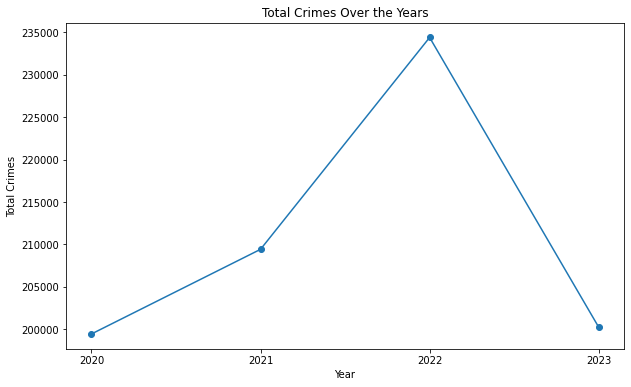

In [16]:
import matplotlib.pyplot as plt

# data from the results of above question
years = [2020, 2021, 2022, 2023]
total_crimes = [199457, 209426, 234375, 200256]

plt.figure(figsize=(10, 6))

#plotting a line plot with dot mamarkers 
plt.plot([str(year) for year in years], total_crimes, marker='o', linestyle='-')

#adding labels to the plot
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.title('Total Crimes Over the Years')

plt.show()

Total Number of Crimes with Respect to Each Quarter 

In [100]:
%%sql
SELECT
    date.year,
    date.quarter_of_year,
    COUNT(fact_table.crime_key) AS total_crimes
FROM
    fact_table
JOIN
    date ON fact_table.date_occ_key = date.key
GROUP BY
    date.year, date.quarter_of_year
ORDER BY
    date.year, date.quarter_of_year;


 * postgresql://student@/group15final
16 rows affected.


year,quarter_of_year,total_crimes
2020,1,51910
2020,2,49917
2020,3,49626
2020,4,48004
2021,1,48278
2021,2,50197
2021,3,55390
2021,4,55561
2022,1,55826
2022,2,60394


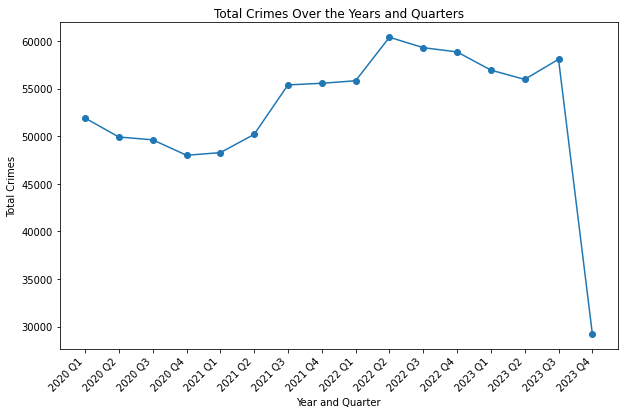

In [15]:

years = [2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021, 2022,
         2022, 2022, 2022, 2023, 2023, 2023, 2023]
quarters = [1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]
total_crimes = [51910, 49917, 49626, 48004, 48278, 50197, 55390, 55561,
                55826, 60394, 59301, 58854, 56945, 55968, 58083, 29260]

#we can combine the year and quarter year information into one varibale to show them on x lable
x_labels = [f"{year} Q{quarter}" for year, quarter in zip(years, quarters)]

plt.figure(figsize=(10, 6))
#creat line plot for each quarter year of year.
plt.plot(x_labels, total_crimes, marker='o', linestyle='-')

#adding lables to the plot
plt.xlabel('Year and Quarter')
plt.ylabel('Total Crimes')
plt.title('Total Crimes Over the Years and Quarters')

# rotating x lables so it will be easy to read. 
plt.xticks(rotation=45, ha='right')

plt.show()

Total Number of Crimes with Respect to Each Month

In [102]:
%%sql
SELECT
    date.year,
    date.month_of_year_str,
    COUNT(ft.crime_key) AS total_crimes
FROM
    fact_table ft
JOIN
    date ON ft.date_occ_key = date.key
GROUP BY
    date.year, date.month_of_year_str
ORDER BY
    total_crimes desc limit 7;


 * postgresql://student@/group15final
7 rows affected.


year,month_of_year_str,total_crimes
2022,May,20413
2022,October,20263
2022,June,20197
2022,August,20077
2022,July,19948
2022,December,19912
2022,April,19784


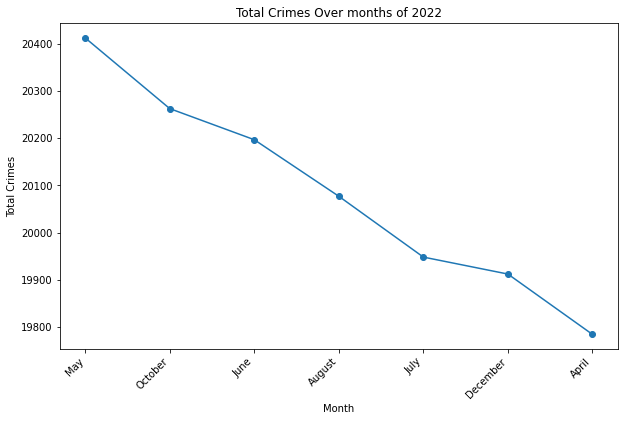

In [14]:
months = ['May', 'October', 'June', 'August', 'July', 'December', 'April']
total_crimes = [20413, 20263, 20197, 20077, 19948, 19912, 19784]

plt.figure(figsize=(10, 6))
plt.plot(months, total_crimes, marker='o', linestyle='-')

plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.title('Total Crimes Over months of 2022')

plt.xticks(rotation=45, ha='right')

plt.show()

### Which areas or neighborhoods have the highest and lowest crime rates?

Crime Distribution with Respect to the Area:

Top Crime 7 Areas:

In [103]:
%%sql
SELECT
    lt.area_name,
    COUNT(ft.crime_key) AS total_crimes
FROM
    fact_table ft
JOIN
    location_table lt ON ft.location_key = lt.location_key
GROUP BY
    lt.area_name
ORDER BY
    total_crimes DESC LIMIT 7;


 * postgresql://student@/group15final
7 rows affected.


area_name,total_crimes
Central,56942
77th Street,53096
Pacific,49307
Southwest,47355
Hollywood,44636
Southeast,42906
Olympic,42540


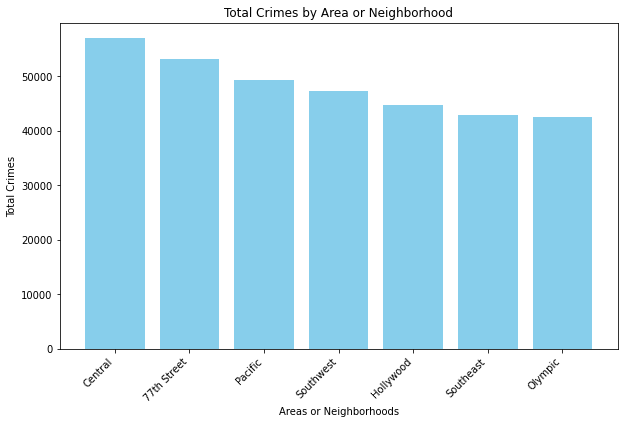

In [17]:
areas = ['Central', '77th Street', 'Pacific', 'Southwest', 
         'Hollywood', 'Southeast', 'Olympic']
total_crimes = [56942, 53096, 49307, 47355, 44636, 42906, 42540]

#ploting bar chart
plt.figure(figsize=(10, 6))
plt.bar(areas, total_crimes, color='skyblue')

#adding title and lables
plt.xlabel('Areas or Neighborhoods')
plt.ylabel('Total Crimes')
plt.title('Total Crimes by Area or Neighborhood')


plt.xticks(rotation=45, ha='right')
plt.show()

Bottom 7 Crime Areas:

In [106]:
%%sql
SELECT
    lt.area_name,
    COUNT(ft.crime_key) AS total_crimes
FROM
    fact_table ft
JOIN
    location_table lt ON ft.location_key = lt.location_key
GROUP BY
    lt.area_name
ORDER BY
    total_crimes ASC LIMIT 7;

 * postgresql://student@/group15final
7 rows affected.


area_name,total_crimes
Foothill,28075
Hollenbeck,31608
Mission,33592
Devonshire,34198
Topanga,34325
Harbor,34795
West Valley,35305


Number of Crimes for Top 5 Areas with respect to the years



In [105]:
%%sql
WITH TopAreas AS (
    SELECT
        lt.area_name,
        COUNT(ft.crime_key) AS total_crimes
    FROM
        fact_table ft
    JOIN
        location_table lt ON ft.location_key = lt.location_key
    GROUP BY
        lt.area_name
    ORDER BY
        total_crimes DESC
    LIMIT 4
)

SELECT
    ta.area_name,
    date.year,
    COUNT(ft.crime_key) AS total_crimes
FROM
    fact_table ft
JOIN
    location_table lt ON ft.location_key = lt.location_key
JOIN
    date ON ft.date_occ_key = date.key
JOIN
    TopAreas ta ON lt.area_name = ta.area_name
GROUP BY
    ta.area_name, date.year
ORDER BY
     date.year, total_crimes desc;


 * postgresql://student@/group15final
16 rows affected.


area_name,year,total_crimes
77th Street,2020,13303
Central,2020,11589
Pacific,2020,11559
Southwest,2020,11155
Central,2021,13153
77th Street,2021,13074
Pacific,2021,12916
Southwest,2021,11390
Central,2022,17671
77th Street,2022,14530


[0 1 2 3]


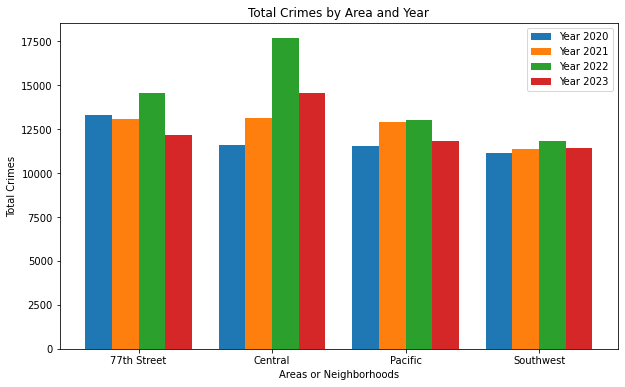

In [32]:
import numpy as np

areas = ['77th Street', 'Central', 'Pacific', 'Southwest']
years = [2020, 2021, 2022, 2023]

total_crimes_data = np.array([
    [13303, 11589, 11559, 11155],
    [13074, 13153, 12916, 11390],
    [14530, 17671, 13010, 11822],
    [12189, 14529, 11822, 11444]
])

bar_width = 0.2
bar_positions = np.arange(len(areas))


fig, ax = plt.subplots(figsize=(10, 6))

for i, year in enumerate(years):
    ax.bar(bar_positions + i * bar_width, total_crimes_data[i], bar_width, label=f'Year {year}')

ax.set_xlabel('Areas or Neighborhoods')
ax.set_ylabel('Total Crimes')
ax.set_title('Total Crimes by Area and Year')
ax.set_xticks(bar_positions + (len(years) - 1) * bar_width / 2)
ax.set_xticklabels(areas)
ax.legend()

plt.show()


Crime Type Dominance by Area

In [111]:
%%sql
WITH RankedCrimes AS (
    SELECT
        location_table.area_name,
        crime_table.crm_cd_desc,
        COUNT(fact_table.crime_key) AS total_crimes,
        ROW_NUMBER() OVER (PARTITION BY location_table.area_name ORDER BY COUNT(fact_table.crime_key) DESC) AS crime_rank
    FROM
        fact_table
    JOIN
        location_table ON fact_table.location_key = location_table.location_key
    JOIN
        crime_table ON fact_table.crime_key = crime_table.crime_key
    GROUP BY
        location_table.area_name, crime_table.crm_cd_desc
)

SELECT
    area_name,
    crm_cd_desc AS highest_crime_type,
    total_crimes
FROM
    RankedCrimes
WHERE
    crime_rank = 1;


 * postgresql://student@/group15final
21 rows affected.


area_name,highest_crime_type,total_crimes
77th Street,VEHICLE - STOLEN,6961
Central,BURGLARY FROM VEHICLE,7960
Devonshire,VEHICLE - STOLEN,3124
Foothill,VEHICLE - STOLEN,3537
Harbor,VEHICLE - STOLEN,4846
Hollenbeck,VEHICLE - STOLEN,4997
Hollywood,BATTERY - SIMPLE ASSAULT,4060
Mission,VEHICLE - STOLEN,4599
N Hollywood,VEHICLE - STOLEN,3904
Newton,VEHICLE - STOLEN,6626


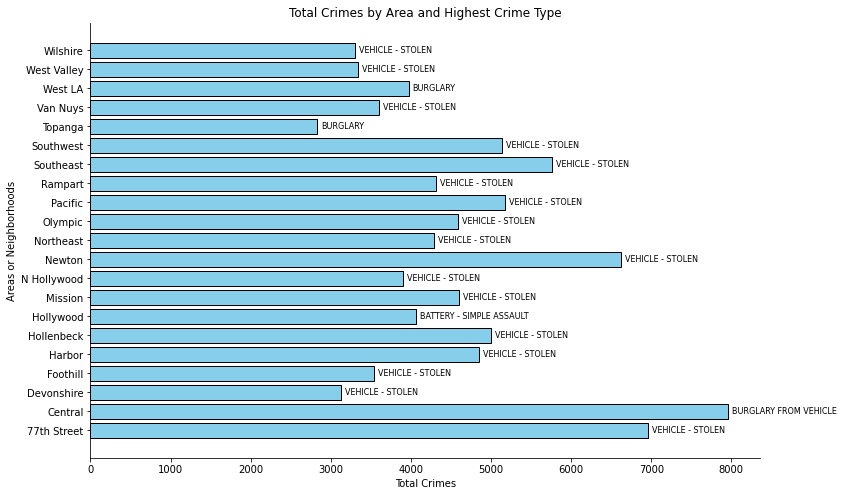

In [27]:
import matplotlib.pyplot as plt

# results from above
areas = ['77th Street', 'Central', 'Devonshire', 'Foothill', 'Harbor', 'Hollenbeck',
         'Hollywood', 'Mission', 'N Hollywood', 'Newton', 'Northeast', 'Olympic',
         'Pacific', 'Rampart', 'Southeast', 'Southwest', 'Topanga', 'Van Nuys',
         'West LA', 'West Valley', 'Wilshire']

highest_crime_types = ['VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'VEHICLE - STOLEN',
                        'VEHICLE - STOLEN', 'VEHICLE - STOLEN', 'VEHICLE - STOLEN',
                        'BATTERY - SIMPLE ASSAULT', 'VEHICLE - STOLEN', 'VEHICLE - STOLEN',
                        'VEHICLE - STOLEN', 'VEHICLE - STOLEN', 'VEHICLE - STOLEN',
                        'VEHICLE - STOLEN', 'VEHICLE - STOLEN', 'VEHICLE - STOLEN',
                        'VEHICLE - STOLEN', 'BURGLARY', 'VEHICLE - STOLEN', 'BURGLARY',
                        'VEHICLE - STOLEN', 'VEHICLE - STOLEN']


total_crimes = [6961, 7960, 3124, 3537, 4846, 4997, 4060, 4599, 3904, 6626, 4290, 4588,
                5177, 4313, 5763, 5138, 2828, 3600, 3970, 3345, 3299]

# plot horizontal bar
plt.figure(figsize=(12, 8))
bars = plt.barh(areas, total_crimes, color='skyblue', edgecolor='black')

# Annotating each bar with highest crime types value
for bar, crime_type in zip(bars, highest_crime_types):
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height() / 2, crime_type,
             ha='left', va='center', color='black', fontsize=8)


# titles and lables
plt.xlabel('Total Crimes')
plt.ylabel('Areas or Neighborhoods')
plt.title('Total Crimes by Area and Highest Crime Type')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

### What are the most common types of crimes, and how do they vary across different areas?

In [116]:
%%sql
SELECT
    crime_table.crm_cd_desc,
    COUNT(fact_table.crime_key) AS total_crimes
FROM
    fact_table
JOIN
    crime_table ON fact_table.crime_key = crime_table.crime_key
GROUP BY
    crime_table.crm_cd_desc
ORDER BY
    total_crimes DESC LIMIT 7;


 * postgresql://student@/group15final
7 rows affected.


crm_cd_desc,total_crimes
VEHICLE - STOLEN,90464
BATTERY - SIMPLE ASSAULT,67300
THEFT OF IDENTITY,53026
BURGLARY FROM VEHICLE,51906
BURGLARY,51363
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",51318
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",48470


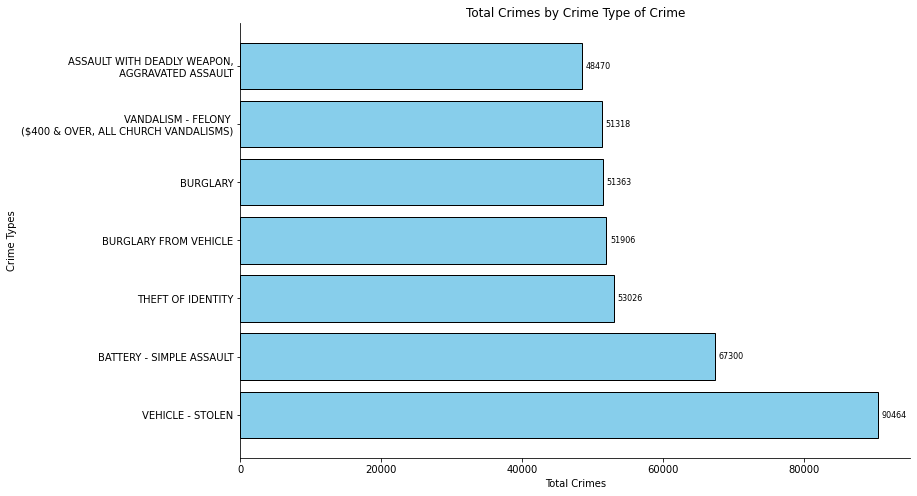

In [31]:
#results
crime_types = ['VEHICLE - STOLEN', 'BATTERY - SIMPLE ASSAULT', 'THEFT OF IDENTITY',
               'BURGLARY FROM VEHICLE', 'BURGLARY',
               'VANDALISM - FELONY \n($400 & OVER, ALL CHURCH VANDALISMS)',
               'ASSAULT WITH DEADLY WEAPON,\n AGGRAVATED ASSAULT']

total_crimes = [90464, 67300, 53026, 51906, 51363, 51318, 48470]

#bar plots
plt.figure(figsize=(12, 8))
bars = plt.barh(crime_types, total_crimes, color='skyblue', edgecolor='black')

# annotating the bars
for bar, total in zip(bars, total_crimes):
    plt.text(bar.get_width() + 500, bar.get_y() + bar.get_height() / 2, f'{total}',
             ha='left', va='center', color='black', fontsize=8)

#labels and title
plt.xlabel('Total Crimes')
plt.ylabel('Crime Types')
plt.title('Total Crimes by Crime Type of Crime')


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

Crime Association by Premises Analysis

In [118]:
%%sql
WITH RankedCrimes AS (
    SELECT
        premis_table.premis_desc,
        crime_table.crm_cd_desc,
        COUNT(fact_table.crime_key) AS total_crimes,
        ROW_NUMBER() OVER (PARTITION BY premis_table.premis_desc ORDER BY COUNT(fact_table.crime_key) DESC) AS crime_rank
    FROM
        fact_table
    JOIN
        premis_table ON fact_table.premis_key = premis_table.premis_key
    JOIN
        crime_table ON fact_table.crime_key = crime_table.crime_key
    GROUP BY
        premis_table.premis_desc, crime_table.crm_cd_desc
)

SELECT
    premis_desc,
    crm_cd_desc AS most_associated_crime,
    total_crimes
FROM
    RankedCrimes
WHERE
    crime_rank = 1;


 * postgresql://student@/group15final
(psycopg2.errors.DiskFull) could not write to file "base/pgsql_tmp/pgsql_tmp6605.0": No space left on device

[SQL: WITH RankedCrimes AS (
    SELECT
        premis_table.premis_desc,
        crime_table.crm_cd_desc,
        COUNT(fact_table.crime_key) AS total_crimes,
        ROW_NUMBER() OVER (PARTITION BY premis_table.premis_desc ORDER BY COUNT(fact_table.crime_key) DESC) AS crime_rank
    FROM
        fact_table
    JOIN
        premis_table ON fact_table.premis_key = premis_table.premis_key
    JOIN
        crime_table ON fact_table.crime_key = crime_table.crime_key
    GROUP BY
        premis_table.premis_desc, crime_table.crm_cd_desc
)

SELECT
    premis_desc,
    crm_cd_desc AS most_associated_crime,
    total_crimes
FROM
    RankedCrimes
WHERE
    crime_rank = 1;]
(Background on this error at: https://sqlalche.me/e/14/e3q8)
